<a href="https://colab.research.google.com/github/princeAnalyst-ML/AndelaLearningCommunity/blob/main/ML_Companies_Prediction_(LR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Import the libraries.
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
%matplotlib inline

In [1]:
from google.colab import files
upload=files.upload()

Saving 1000_Companies.csv to 1000_Companies.csv


In [46]:
Comp_data=pd.read_csv('1000_Companies.csv')
Comp_data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [47]:
X=Comp_data.iloc[:,:-1].values
y=Comp_data.iloc[:,4].values

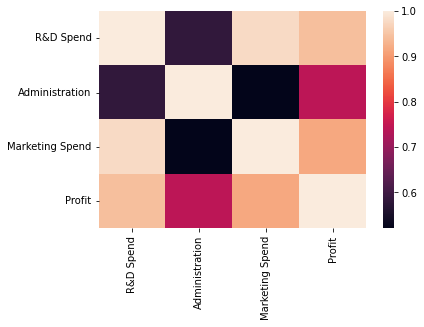

In [48]:
#Data visualisation. Building a correlation matrix.
sns.heatmap(Comp_data.corr())

In [49]:
from pandas.core.arrays import categorical
#Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder=LabelEncoder()
X[:,3]=labelencoder.fit_transform(X[:,3])

onehotencoder=OneHotEncoder()#categorical_features=[3])
X=onehotencoder.fit_transform(X).toarray()
#print(X[0])

In [50]:
# Avoiding Dummy variable Trap.
X=X[:,1:]

In [51]:
#Creating the model.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)



In [52]:
# Multiple Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [53]:
y_pred=regressor.predict(X_test)
y_pred

array([119464.48838672, 119297.80457341, 120524.47906843, 118007.34616505,
       118931.12518248, 123428.66940176, 121705.33574535, 120202.06120929,
       119902.69173597, 119239.50649513, 119297.80457341, 119241.93175784,
       119929.37769501, 120069.40750824, 119868.18480315, 119975.04172921,
       120062.7954092 , 120047.88577465, 119238.91037331, 124102.93014126,
       120856.19913131, 118270.63038698, 119500.12991682, 123778.42809848,
       120229.06320878, 119985.44560834, 118702.73853765,  71203.54159807,
       120509.62287636, 120074.98613906, 121223.00029958, 120202.06120929,
       119351.07643224, 119008.61765429, 120259.65729839, 119393.83385065,
       120106.11899998, 120365.76922425, 120201.46865458, 120058.94497364,
       119280.61700542, 119557.1309204 , 120058.17889459, 120982.40290558,
       114755.34789635, 120409.84328718, 119105.68416084, 120948.33107589,
       119875.25674535, 120202.06120929, 120303.67117194, 119270.26616536,
       120202.06120929, 1

In [54]:
regressor.coef_ #calculating the Coefficients

array([ -9386.60711073, -15349.52531479, -23410.22675508, ...,
         1318.38853943,   1545.40801951,    641.15138363])

In [55]:
regressor.intercept_  #Calculating the intercepts

118656.65318977718

In [56]:
#Calculating the R squared value to predict how good our model is.
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.020325232773761526